In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

df = pd.read_csv('../../preprocessed/data.csv')
df.dropna(inplace=True)

x = df.drop(columns=['단지명','주소', '거래금액(만원)','계약년월','전용면적(㎡)','층','위도','경도','건축년도'])
y = df[['거래금액(만원)']]

y = y.apply(lambda x: x.str.replace(',', '').astype(float))['거래금액(만원)']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam


# 모델 생성
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))  # 64개의 뉴런, relu 활성화 함수
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # 출력이 1개의 실수 값

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',   # 검증 데이터의 손실 값을 모니터링
    patience=10,          # 10 에포크 동안 개선되지 않으면 학습 중단
    restore_best_weights=True  # 학습 중 가장 성능이 좋았던 가중치 복원
)

# 모델 학습
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# 모델 평가
mse = model.evaluate(x_test, y_test, verbose=0)
print(f"Test MSE: {mse}")

# 예측
y_pred = model.predict(x_test)


Epoch 1/100


/Users/hdk/anaconda3/envs/qa_system/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1013589824.0000 - val_loss: 214290080.0000
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 110368080.0000 - val_loss: 114490096.0000
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83343032.0000 - val_loss: 48966676.0000
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74351224.0000 - val_loss: 92332368.0000
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70056440.0000 - val_loss: 40238092.0000
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68140064.0000 - val_loss: 97701936.0000
Epoch 7/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60760084.0000 - val_loss: 70329744.0000
Epoch 8/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62259528.0000 - val_loss: 51256360.0000
Epoch 9/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56167388.0000 - val_loss: 35446432.0000
Epoch 10/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51597704.0000 - val_loss: 29291402.0

In [15]:
from sklearn.metrics import *

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")

MSE: 26680793.99886734
MAE: 3319.1124837451234
RMSE: 5165.3454868834615
R^2: 0.8900152140341411
Explained Variance Score: 0.8920834372209737


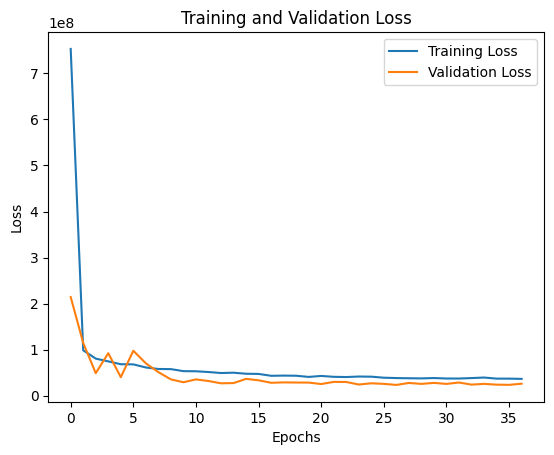

In [16]:
import matplotlib.pyplot as plt

# 손실 값 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()